# アミノ酸配列のグラフ表示画像のVision Transformerによるタンパク質ファミリー分類（5分割交差検証）
- グラデーション適用
- クラスごとに分ける `StratifiedKFold` を採用
- ベースモデル：`google/vit-base-patch16-224-in21k`
- ハイパーパラメータ
    - バッチサイズ：$16$
    - エポック数：$20$
    - 学習率：$5 \times 10^{-5}$
    - L2正則化：$1 \times 10^{-3}$

## 1. ライブラリのインポート

In [1]:
from torch.utils.data import Dataset, Subset
from PIL import Image
import os
import pandas as pd
import numpy as np

from torchvision.transforms import Compose, Resize, ToTensor, Normalize
from transformers import ViTImageProcessorFast, ViTForImageClassification, TrainingArguments, Trainer
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import evaluate

label2id = {"A": 0, "B": 1, "C": 2, "D": 3, "E": 4}
id2label = {v: k for k, v in label2id.items()}

## 1. 画像とラベルの対応を取る `Dataset` を作成

In [2]:
class GPCRImageDataset(Dataset):
    def __init__(self, csv_path, img_dir, transform=None):
        self.data = pd.read_csv(csv_path, header=None, names=["num", "label", "accession"])
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        img_path = os.path.join(self.img_dir, f"{row['num']}.png")
        image = Image.open(img_path).convert("RGB")
        label = label2id[row["label"]]

        if self.transform:
            image = self.transform(image)
        return {"pixel_values": image, "label": label}

## 2. 画像前処理（ViT用）

In [3]:
processor = ViTImageProcessorFast.from_pretrained("google/vit-base-patch16-224-in21k")
transform = Compose([
    Resize((224, 224)),
    ToTensor(),
    Normalize(mean=processor.image_mean, std=processor.image_std)
])

## 3. `Trainer` を使って学習

In [4]:
accuracy = evaluate.load("accuracy")
dataset = GPCRImageDataset("../gpcr_labels.csv", "../graphs/gradation", transform=transform)

# StratifiedKFoldはラベル情報を使う
labels = dataset.data["label"].values
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

[Fold 1 / 5]


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\ArchWizard7\AppData\Local\Temp\ipykernel_33316\3298343351.py:56: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,No log,0.170623,0.957254,0.551079,0.554837,0.552932
2,0.324700,0.132858,0.968912,0.572747,0.558160,0.564626
3,0.117200,0.173890,0.961140,0.773442,0.747555,0.759610
4,0.066100,0.142915,0.966321,0.769189,0.757053,0.762910
5,0.066100,0.148838,0.967617,0.776499,0.750717,0.762656
6,0.035100,0.152886,0.970207,0.779484,0.751448,0.764205
7,0.024600,0.157554,0.968912,0.775287,0.753789,0.763952
8,0.020400,0.131766,0.975389,0.776542,0.763310,0.769539
9,0.020400,0.139567,0.970855,0.768297,0.762699,0.765425
10,0.017200,0.180048,0.967617,0.782105,0.700906,0.736576


Accuracy: 0.9741 | Precision: 0.7794 | Recall: 0.7593 | F1: 0.7687
              precision    recall  f1-score      support
A              0.977757  0.994345  0.985981  1061.000000
B              0.950617  0.846154  0.895349    91.000000
C              0.968421  0.955844  0.962092   385.000000
D              0.000000  0.000000  0.000000     3.000000
E              1.000000  1.000000  1.000000     4.000000
accuracy       0.974093  0.974093  0.974093     0.974093
macro avg      0.779359  0.759269  0.768684  1544.000000
weighted avg   0.971987  0.974093  0.972803  1544.000000


E:\GR2025\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
E:\GR2025\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
E:\GR2025\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


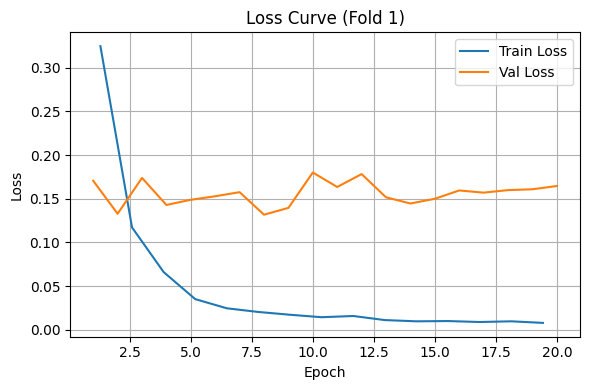

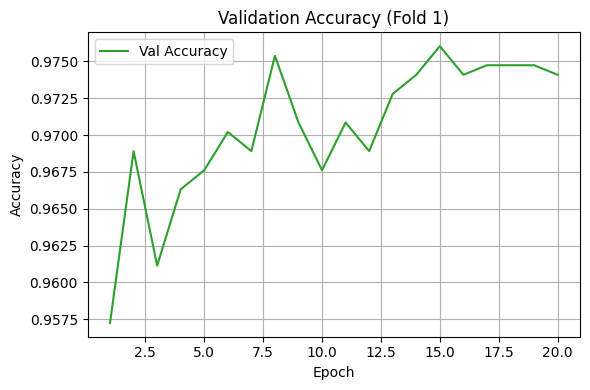

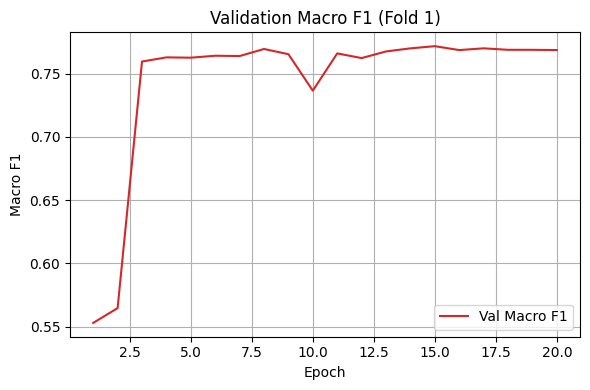

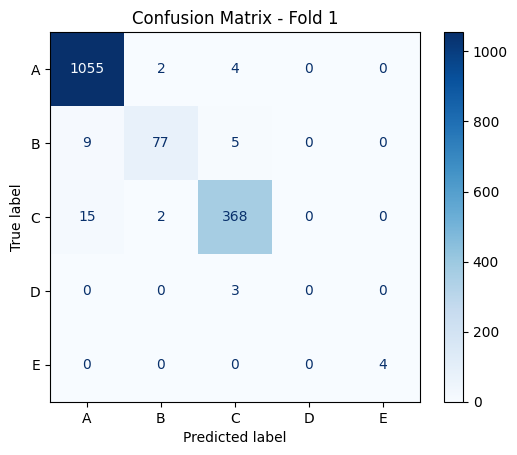

[Fold 2 / 5]


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\ArchWizard7\AppData\Local\Temp\ipykernel_33316\3298343351.py:56: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,No log,0.174061,0.949449,0.545829,0.535093,0.539578
2,0.310100,0.147263,0.963707,0.565766,0.554795,0.559876
3,0.107500,0.181378,0.952690,0.769917,0.655583,0.702660
4,0.066700,0.162358,0.966299,0.761796,0.695539,0.721554
5,0.066700,0.162577,0.968892,0.875655,0.808913,0.835740
6,0.033300,0.154657,0.967596,0.900192,0.892055,0.895881
7,0.031200,0.159922,0.965651,0.816113,0.813138,0.806833
8,0.024500,0.168170,0.968892,0.892526,0.888252,0.889859
9,0.024500,0.209579,0.959819,0.871352,0.796876,0.827160
10,0.023400,0.158358,0.969540,0.903378,0.889542,0.895942


Accuracy: 0.9715 | Precision: 0.9045 | Recall: 0.8931 | F1: 0.8984
              precision    recall  f1-score      support
A              0.986755  0.983035  0.984891  1061.000000
B              0.926829  0.844444  0.883721    90.000000
C              0.942211  0.971503  0.956633   386.000000
D              0.666667  0.666667  0.666667     3.000000
E              1.000000  1.000000  1.000000     3.000000
accuracy       0.971484  0.971484  0.971484     0.971484
macro avg      0.904492  0.893130  0.898382  1543.000000
weighted avg   0.971520  0.971484  0.971332  1543.000000


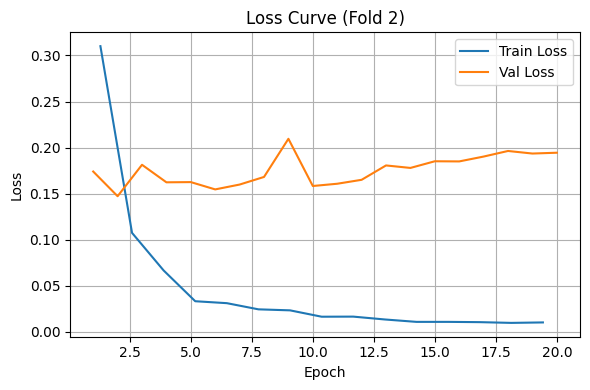

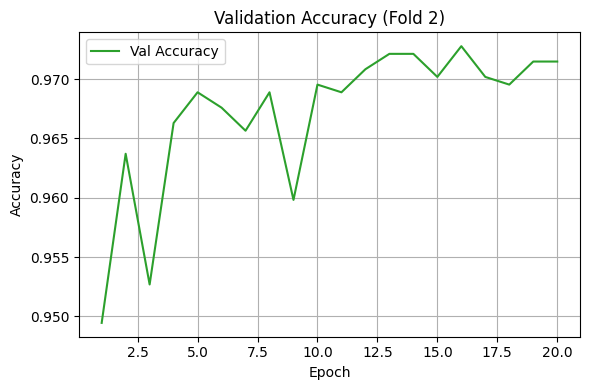

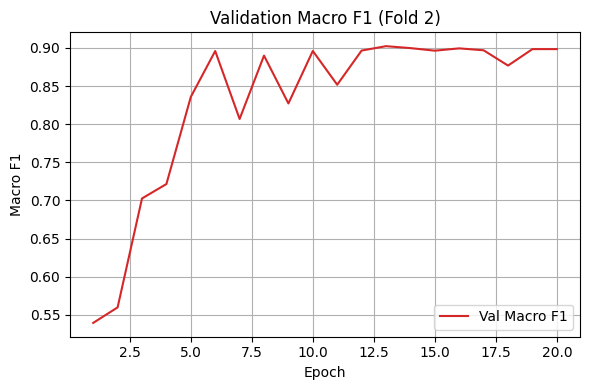

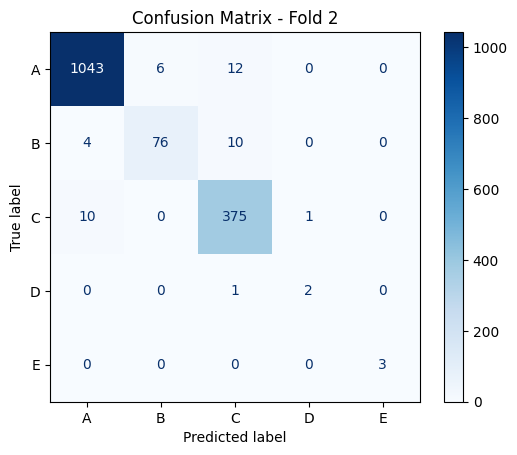

[Fold 3 / 5]


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\ArchWizard7\AppData\Local\Temp\ipykernel_33316\3298343351.py:56: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,No log,0.189120,0.949449,0.557203,0.555187,0.555870
2,0.302800,0.205440,0.937784,0.510021,0.566714,0.533085
3,0.120100,0.142076,0.964355,0.862172,0.833675,0.844542
4,0.062900,0.159704,0.960467,0.900242,0.892432,0.895992
5,0.062900,0.154637,0.969540,0.781190,0.762317,0.770964
6,0.041600,0.196110,0.954634,0.808126,0.767100,0.779355
7,0.024600,0.186660,0.965003,0.755876,0.702226,0.722185
8,0.021300,0.195255,0.965003,0.769398,0.699590,0.727806
9,0.021300,0.189262,0.965003,0.763453,0.700217,0.725142
10,0.013300,0.211055,0.964355,0.760822,0.696998,0.722183


Accuracy: 0.9669 | Precision: 0.7722 | Recall: 0.7643 | F1: 0.7681
              precision    recall  f1-score      support
A              0.978404  0.983019  0.980706  1060.000000
B              0.941860  0.890110  0.915254    91.000000
C              0.940874  0.948187  0.944516   386.000000
D              0.000000  0.000000  0.000000     3.000000
E              1.000000  1.000000  1.000000     3.000000
accuracy       0.966948  0.966948  0.966948     0.966948
macro avg      0.772228  0.764263  0.768095  1543.000000
weighted avg   0.965000  0.966948  0.965923  1543.000000


E:\GR2025\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
E:\GR2025\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
E:\GR2025\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


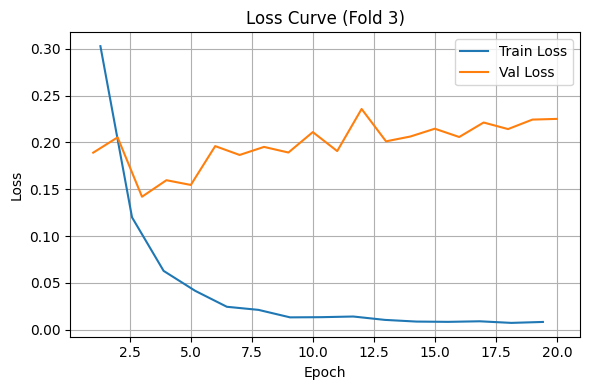

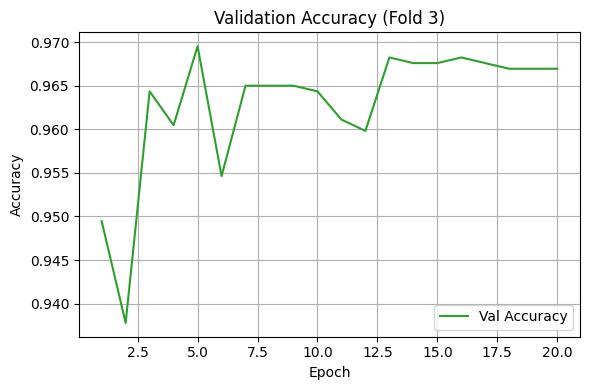

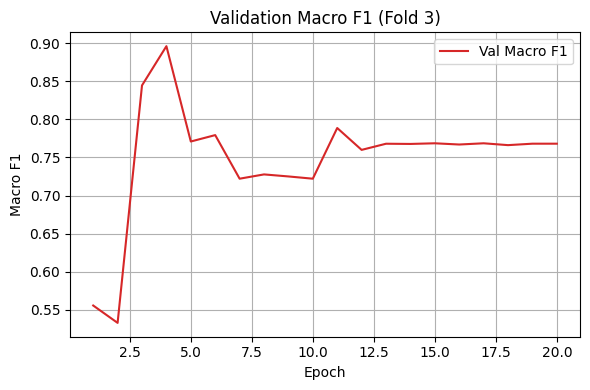

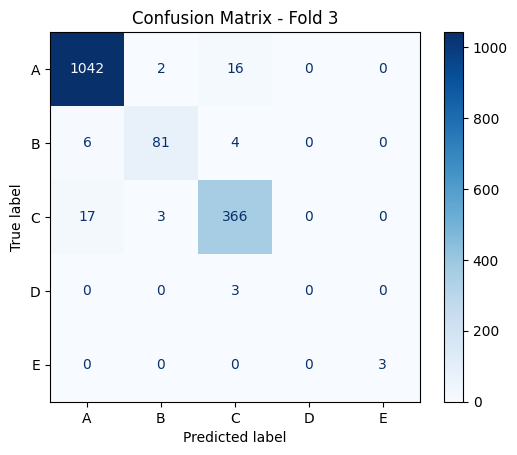

[Fold 4 / 5]


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\ArchWizard7\AppData\Local\Temp\ipykernel_33316\3298343351.py:56: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,No log,0.206963,0.947505,0.534230,0.550835,0.542197
2,0.311900,0.146770,0.957226,0.563241,0.540557,0.550481
3,0.125300,0.196183,0.943616,0.718810,0.706120,0.706904
4,0.076000,0.183947,0.960467,0.766660,0.739099,0.751501
5,0.076000,0.153656,0.965651,0.981124,0.831659,0.885006
6,0.040100,0.170267,0.962411,0.757739,0.758012,0.757602
7,0.029800,0.161660,0.968244,0.771345,0.751376,0.760634
8,0.019400,0.193368,0.959819,0.760810,0.750900,0.755030
9,0.019400,0.163665,0.967596,0.771300,0.752505,0.760993
10,0.020000,0.170085,0.968244,0.765254,0.764090,0.764628


Accuracy: 0.9695 | Precision: 0.7707 | Recall: 0.7608 | F1: 0.7654
              precision    recall  f1-score     support
A              0.983019  0.983019  0.983019  1060.00000
B              0.928571  0.857143  0.891429    91.00000
C              0.941772  0.963731  0.952625   386.00000
D              0.000000  0.000000  0.000000     2.00000
E              1.000000  1.000000  1.000000     4.00000
accuracy       0.969540  0.969540  0.969540     0.96954
macro avg      0.770672  0.760778  0.765414  1543.00000
weighted avg   0.968259  0.969540  0.968784  1543.00000


E:\GR2025\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
E:\GR2025\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
E:\GR2025\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


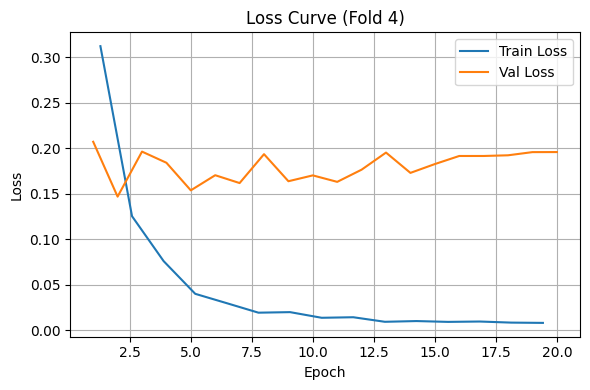

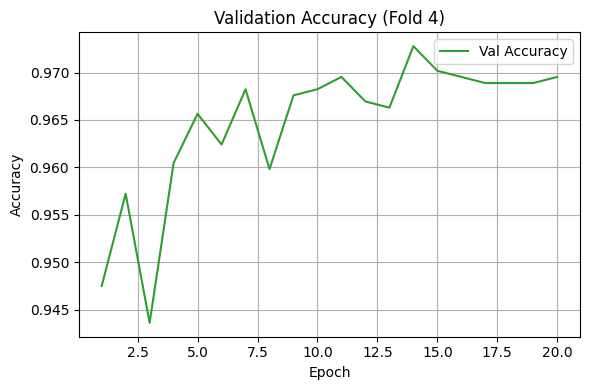

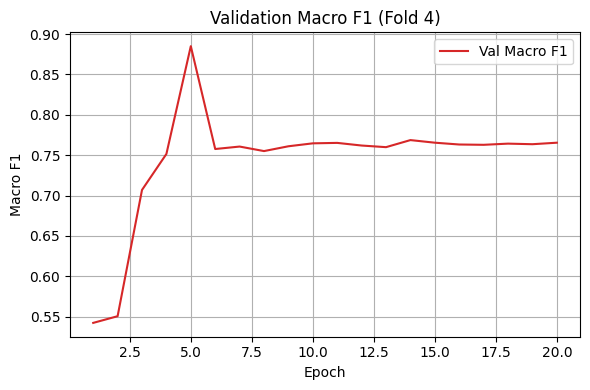

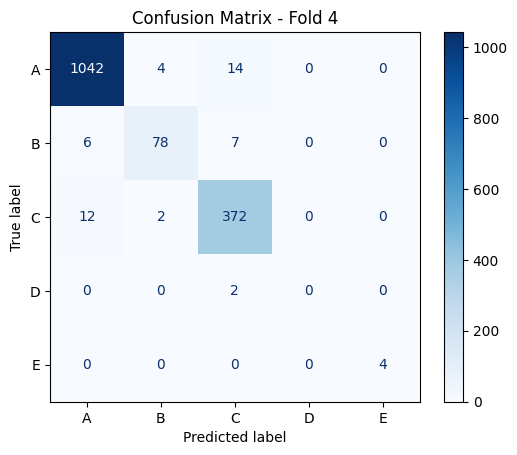

[Fold 5 / 5]


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\ArchWizard7\AppData\Local\Temp\ipykernel_33316\3298343351.py:56: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,No log,0.193854,0.949449,0.538726,0.538390,0.538512
2,0.296900,0.125704,0.961763,0.558058,0.551594,0.554597
3,0.116700,0.136056,0.961763,0.755918,0.603415,0.634536
4,0.070600,0.129796,0.969540,0.931233,0.856539,0.874143
5,0.070600,0.169294,0.967596,0.980115,0.791110,0.862034
6,0.039000,0.130714,0.971484,0.831940,0.866524,0.845893
7,0.024000,0.128843,0.970836,0.962427,0.861988,0.895539
8,0.024400,0.160027,0.966299,0.832137,0.858690,0.842024
9,0.024400,0.170419,0.965003,0.833990,0.859366,0.843127
10,0.016200,0.193425,0.965003,0.843762,0.864276,0.853410


Accuracy: 0.9708 | Precision: 0.8694 | Recall: 0.8599 | F1: 0.8644
              precision    recall  f1-score      support
A              0.985795  0.982075  0.983932  1060.000000
B              0.916667  0.846154  0.880000    91.000000
C              0.944584  0.971503  0.957854   386.000000
D              0.500000  0.500000  0.500000     2.000000
E              1.000000  1.000000  1.000000     4.000000
accuracy       0.970836  0.970836  0.970836     0.970836
macro avg      0.869409  0.859946  0.864357  1543.000000
weighted avg   0.970816  0.970836  0.970693  1543.000000


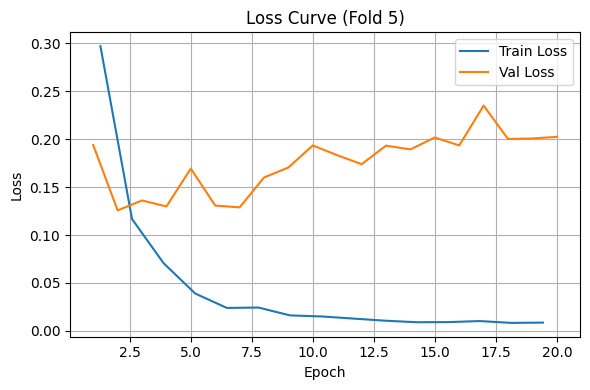

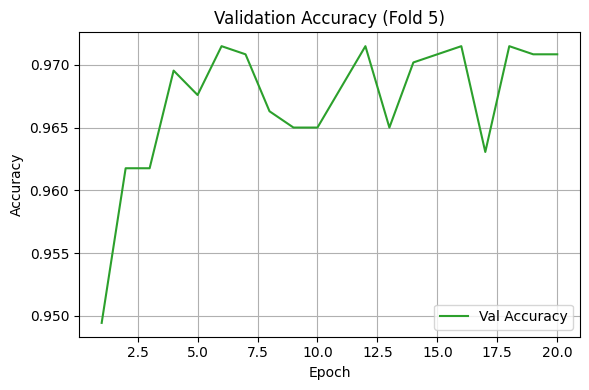

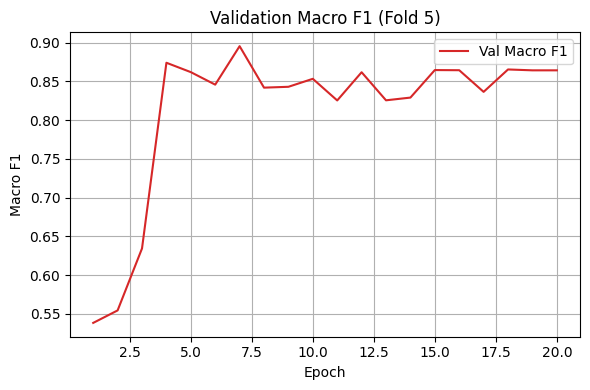

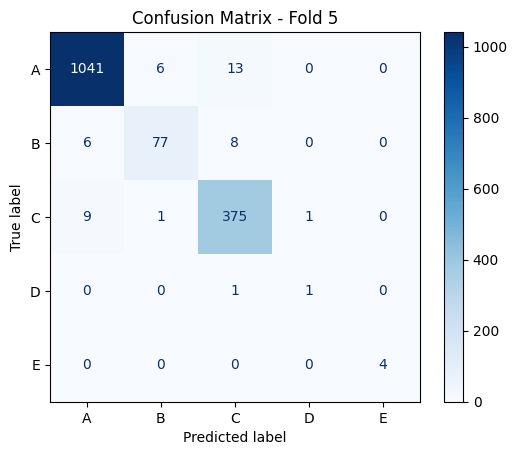

In [5]:
BATCH_SIZE = 16
EPOCHS = 20
LR = 5e-5
WEIGHT_DECAY = 1e-3

all_accs, all_pres, all_recs, all_f1s = [], [], [], []
all_class_f1s, all_conf_matrices = [], []
all_val_losses, all_val_accs, all_val_f1s = [], [], []

for fold, (train_idx, val_idx) in enumerate(kfold.split(np.zeros(len(labels)), labels)):
    print(f"\033[34m[Fold {fold+1} / 5]\033[0m")

    # Subset 作成
    train_dataset = Subset(dataset, train_idx)
    val_dataset = Subset(dataset, val_idx)

    # ======================
    # 4. モデル初期化
    # ======================
    model = ViTForImageClassification.from_pretrained(
        "google/vit-base-patch16-224-in21k",
        num_labels=5,
        id2label=id2label,
        label2id=label2id
    )

    training_args = TrainingArguments(
        output_dir=f"../models/amino-classification-transformer-vit-google-stratified-kfold/batch-{BATCH_SIZE}-epoch-{EPOCHS}-lr-{LR}-wd-{WEIGHT_DECAY}/{fold+1}",
        per_device_train_batch_size=BATCH_SIZE,
        per_device_eval_batch_size=BATCH_SIZE,
        eval_strategy="epoch",
        save_strategy="no",
        num_train_epochs=EPOCHS,
        logging_dir="./logs",
        report_to="none",
        learning_rate=LR,
        weight_decay=WEIGHT_DECAY,
        load_best_model_at_end=False
    )

    # ======================
    # 5. 評価指標
    # ======================
    def compute_metrics(eval_pred):
        logits, labels = eval_pred
        preds = np.argmax(logits, axis=-1)
        acc = accuracy.compute(predictions=preds, references=labels)["accuracy"]
        f1 = f1_score(labels, preds, average="macro")
        pre = precision_score(labels, preds, average="macro", zero_division=0)
        rec = recall_score(labels, preds, average="macro", zero_division=0)
        return {"accuracy": acc, "precision": pre, "recall": rec, "f1": f1}

    # ======================
    # 6. Trainer実行
    # ======================
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        tokenizer=processor,
        compute_metrics=compute_metrics
    )

    trainer.train()

    # ==== ログから学習曲線抽出 ====
    log_history = pd.DataFrame(trainer.state.log_history)
    log_history = log_history.dropna(subset=["epoch"])
    train_loss = log_history[log_history["loss"].notna()][["epoch", "loss"]]
    eval_loss = log_history[log_history["eval_loss"].notna()][["epoch", "eval_loss", "eval_accuracy", "eval_f1"]]

    all_val_losses.append(eval_loss["eval_loss"].values)
    all_val_accs.append(eval_loss["eval_accuracy"].values)
    all_val_f1s.append(eval_loss["eval_f1"].values)

    # ======================
    # 7. 推論と評価
    # ======================
    preds = trainer.predict(val_dataset)
    y_true = preds.label_ids
    y_pred = np.argmax(preds.predictions, axis=1)

    acc = accuracy.compute(predictions=y_pred, references=y_true)["accuracy"]
    pre = precision_score(y_true, y_pred, average="macro", zero_division=0)
    rec = recall_score(y_true, y_pred, average="macro", zero_division=0)
    f1 = f1_score(y_true, y_pred, average="macro")
    cm = confusion_matrix(y_true, y_pred, labels=list(label2id.values()))

    report = classification_report(y_true, y_pred, target_names=list(label2id.keys()), output_dict=True)
    class_f1 = [report[c]["f1-score"] for c in list(label2id.keys())]

    # ==== 保存 ====
    all_accs.append(acc)
    all_pres.append(pre)
    all_recs.append(rec)
    all_f1s.append(f1)
    all_class_f1s.append(class_f1)
    all_conf_matrices.append(cm)

    # ==== 表示 ====
    print(f"\033[91mAccuracy: {acc:.4f}\033[0m | "
          f"\033[92mPrecision: {pre:.4f}\033[0m | "
          f"\033[93mRecall: {rec:.4f}\033[0m | "
          f"\033[94mF1: {f1:.4f}\033[0m")
    print(pd.DataFrame(report).T)

    # ==== foldごとの学習曲線を可視化 ====
    # --- Loss 曲線 ---
    plt.figure(figsize=(6, 4))
    plt.plot(train_loss["epoch"], train_loss["loss"], label="Train Loss", color="C0")
    plt.plot(eval_loss["epoch"], eval_loss["eval_loss"], label="Val Loss", color="C1")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(f"Loss Curve (Fold {fold+1})")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # --- Accuracy 曲線 ---
    plt.figure(figsize=(6, 4))
    plt.plot(eval_loss["epoch"], eval_loss["eval_accuracy"], label="Val Accuracy", color="C2")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title(f"Validation Accuracy (Fold {fold+1})")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # --- Macro F1 曲線 ---
    plt.figure(figsize=(6, 4))
    plt.plot(eval_loss["epoch"], eval_loss["eval_f1"], label="Val Macro F1", color="C3")
    plt.xlabel("Epoch")
    plt.ylabel("Macro F1")
    plt.title(f"Validation Macro F1 (Fold {fold+1})")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 混同行列を可視化
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(label2id.keys()))
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - Fold {fold+1}")
    plt.show()

## 4. 平均可視化

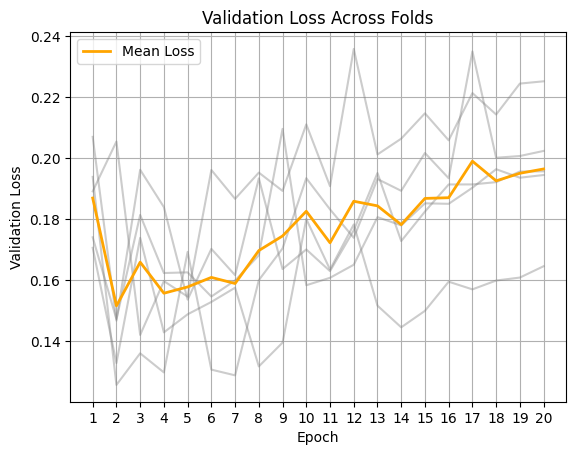

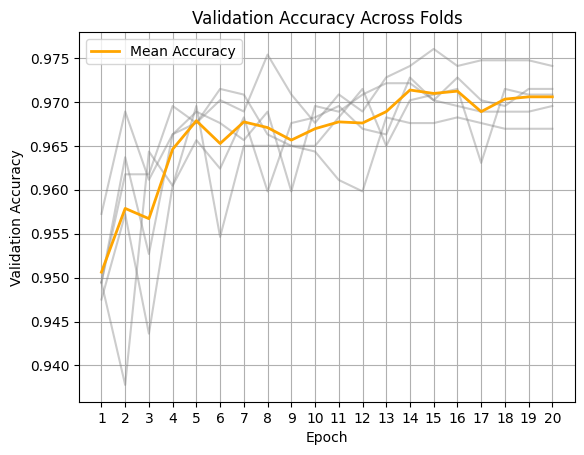

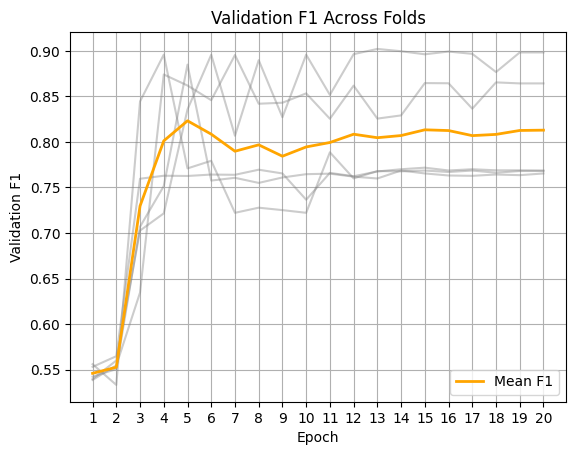

In [6]:
epochs = np.arange(1, EPOCHS + 1)

def interp_to_epochs(arr):
    arr = np.asarray(arr)
    orig_x = np.arange(1, len(arr) + 1)

    if len(arr) == 1:
        return np.full_like(epochs, arr[0], dtype=float)

    return np.interp(epochs, orig_x, arr)

def plot_mean_curves(all_vals, y_label, title, metric_name):
    interp_vals = []

    for v in all_vals:
        v_interp = interp_to_epochs(v)
        interp_vals.append(v_interp)
        plt.plot(epochs, v_interp, color="gray", alpha=0.4)

    interp_vals = np.vstack(interp_vals)
    mean_vals = interp_vals.mean(axis=0)

    plt.plot(epochs, mean_vals, color="orange", linewidth=2, label=f"Mean {metric_name}")
    plt.xlabel("Epoch"); plt.ylabel(y_label); plt.title(title)
    plt.xticks(epochs)
    plt.legend(); plt.grid(True)
    plt.show()

plot_mean_curves(all_val_losses, "Validation Loss", "Validation Loss Across Folds", "Loss")
plot_mean_curves(all_val_accs, "Validation Accuracy", "Validation Accuracy Across Folds", "Accuracy")
plot_mean_curves(all_val_f1s, "Validation F1", "Validation F1 Across Folds", "F1")

## 5. 総合評価


===== Average Across 5 Folds =====
Accuracy : 0.9706
Precision: 0.8192
Recall   : 0.8075
F1       : 0.8130

Per-Class F1 (Macro Average):
  A: 0.9837
  B: 0.8932
  C: 0.9547
  D: 0.2333
  E: 1.0000


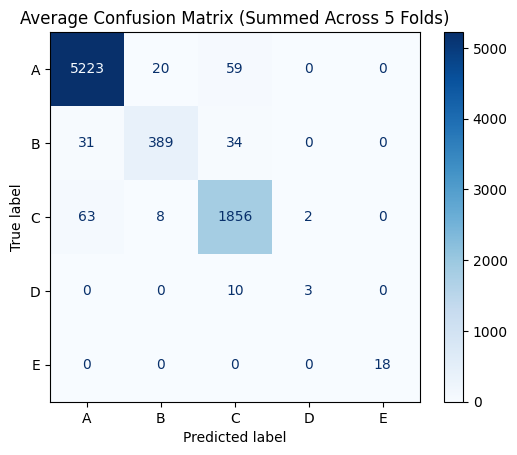

In [7]:
mean_acc = np.mean(all_accs)
mean_pre = np.mean(all_pres)
mean_rec = np.mean(all_recs)
mean_f1 = np.mean(all_f1s)
mean_class_f1 = np.mean(np.array(all_class_f1s), axis=0)

print("\n\033[36m===== Average Across 5 Folds =====\033[0m")
print(f"Accuracy : {mean_acc:.4f}")
print(f"Precision: {mean_pre:.4f}")
print(f"Recall   : {mean_rec:.4f}")
print(f"F1       : {mean_f1:.4f}\n")

print("Per-Class F1 (Macro Average):")
for cls, score in zip(label2id.keys(), mean_class_f1):
    print(f"  {cls}: {score:.4f}")

# ==== 混同行列平均表示 ====
mean_cm = np.sum(all_conf_matrices, axis=0)
disp = ConfusionMatrixDisplay(confusion_matrix=mean_cm, display_labels=list(label2id.keys()))
disp.plot(cmap="Blues")
plt.title("Average Confusion Matrix (Summed Across 5 Folds)")
plt.show()